## Gráfico BoxPlot e Outliers

In [1]:
# carrega dependencias
import numpy as np
import pandas as pd

In [2]:
# monta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# carrega os dados
enem_sp = pd.read_csv('/content/drive/MyDrive/UDEMY - Estatística para Análise de Dados/Moreno Marcos/microdados_enem_2019_sp_tratado.csv', sep=',', encoding='iso-8859-1')
enem_sp

,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,Santa Isabel,22,M,1,parda,1,Santa Izabel do Pará,PA,1,4,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,São Paulo,17,F,1,parda,1,Belém,PA,2,0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,São Bernardo do Campo,19,M,1,parda,1,São Bernardo do Campo,SP,2,0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,Embu-Guaçu,17,F,1,parda,1,Itacoatiara,AM,2,0,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,Guarulhos,23,F,1,branca,1,São Paulo,SP,1,5,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499935,São Paulo,18,F,1,parda,1,São Paulo,SP,1,1,...,479.1,Espanhol,1.0,100.0,120.0,120.0,140.0,100.0,580.0,Sim
499936,São Paulo,17,F,1,preta,1,São Paulo,SP,2,0,...,43.2,Espanhol,1.0,80.0,120.0,140.0,120.0,100.0,560.0,Sim
499937,São Paulo,17,F,1,parda,1,São Paulo,SP,2,0,...,487.3,Inglês,1.0,120.0,80.0,60.0,120.0,0.0,380.0,Sim
499938,São Paulo,17,M,1,parda,1,São Paulo,SP,2,0,...,401.1,Inglês,1.0,160.0,120.0,160.0,140.0,160.0,740.0,Não


### Matplotlib

In [29]:
import matplotlib.pyplot as plt

Vamos a graficar o BOXPLOT das notas de matemática dos alunos.

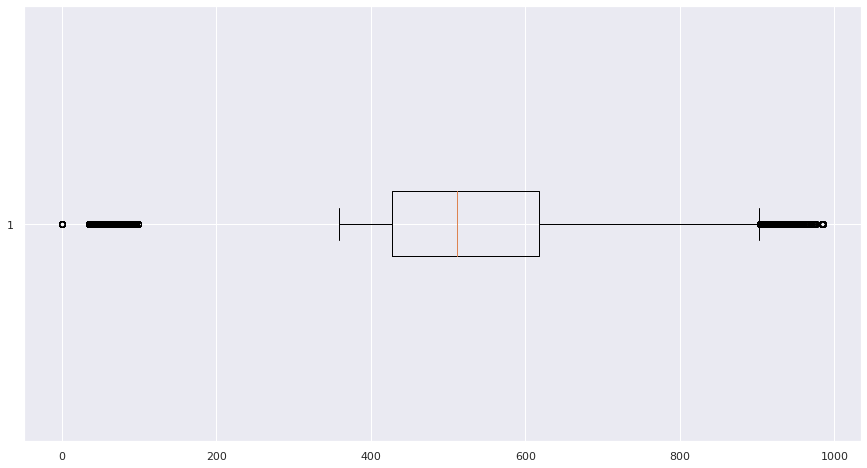

In [30]:
plt.boxplot(enem_sp.NOTA_MT, vert=False)
plt.show()

Analogamente com a biblioteca seaborn.

In [22]:
import seaborn as sns

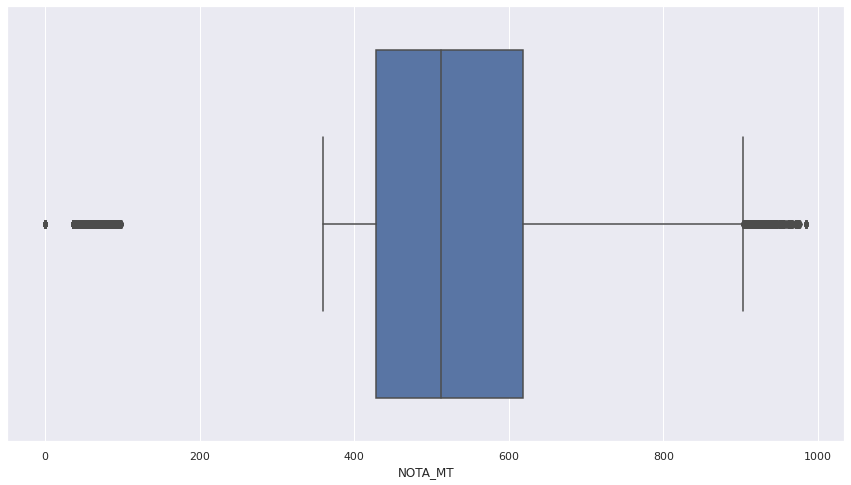

In [31]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='NOTA_MT', data=enem_sp);

Analogamente com a biblioteca plotly.

In [32]:
import plotly.express as px

In [ ]:
grafico = px.box(enem_sp, y="NOTA_MT")
grafico.show()

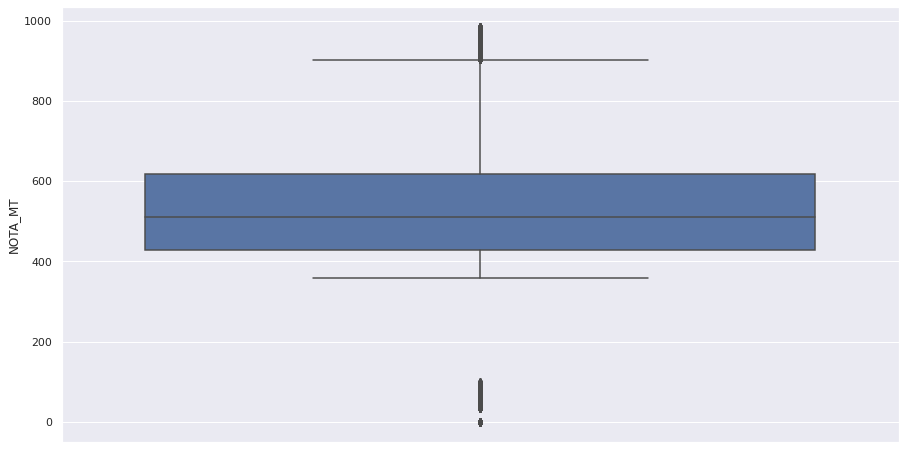

In [47]:
sns.boxplot(y="NOTA_MT", data=enem_sp)

- Os pontos pretos 'seriam' os outliers das notas de matemáticas;
- Aproximadamente esses outliers estão concentrados em 2 grupos. O primiero grupo no intervalo de notas de 0 a 100 e o outro grupo está no intervalo de 900 a 1000;
- Repare que esses outliers são as notas dos alunos, ou seja, não são valores errados, logo tem de ser usadas na análise.

Suponhamos que queremos "EXCLUIR OS OUTLIER" segundo o boxplot associada à nota de matemáticas.

In [36]:
sem_outliers = enem_sp.loc[enem_sp.NOTA_MT <= 902.9 ]  # 902.2 é o LS

In [37]:
sem_outliers = sem_outliers.loc[sem_outliers.NOTA_MT >= 359.1]  # 359.1 [e o LI]

In [38]:
sem_outliers.head()

,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,Santa Isabel,22,M,1,parda,1,Santa Izabel do Pará,PA,1,4,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,São Paulo,17,F,1,parda,1,Belém,PA,2,0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,São Bernardo do Campo,19,M,1,parda,1,São Bernardo do Campo,SP,2,0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,Embu-Guaçu,17,F,1,parda,1,Itacoatiara,AM,2,0,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,Guarulhos,23,F,1,branca,1,São Paulo,SP,1,5,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Verificamos graficamente que excluímos os outliers associdas à nota de matemáticas. CUIDADO!. serão recalculados os LI e LS da nova tabela: SEM_OUTLIERS. Logo pode ser que aparecam alguns "novos" outliers. No entanto, lembrar que  já foram EXCLUIDOS previamente os outliers e os novos apenas devemos desconsiderar.

In [ ]:
grafico = px.box(sem_outliers, y="NOTA_MT")
grafico.show()

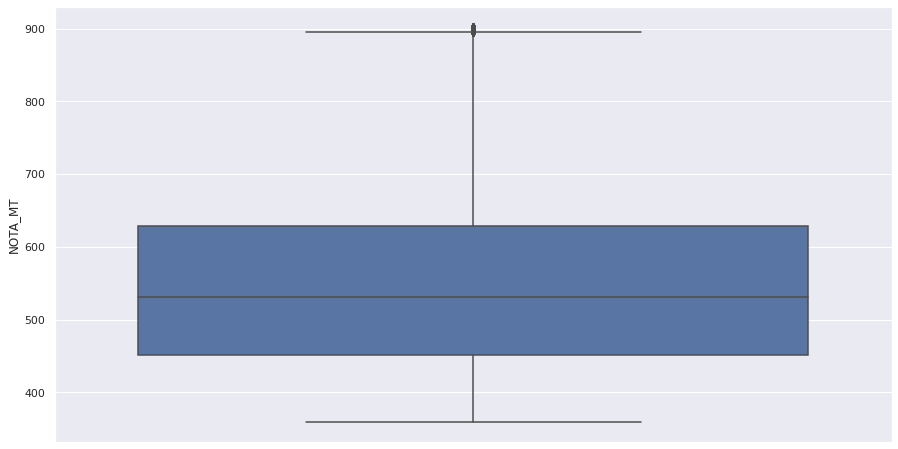

In [48]:
sns.boxplot(y="NOTA_MT", data=sem_outliers)

Verificamos os outliers graficando o BOXPLOT das outras notas do ENEM.

In [ ]:
grafico = px.box(enem_sp, y="NOTA_CN")
grafico.show()

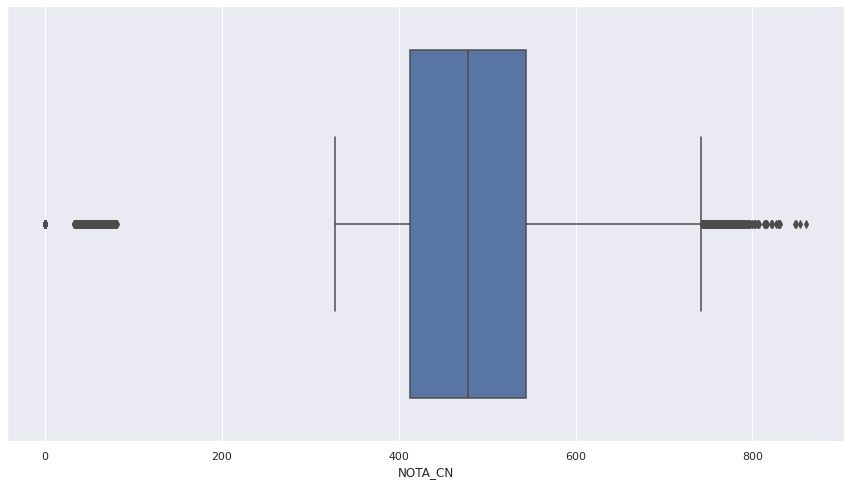

In [51]:
sns.boxplot(x="NOTA_CN", data=enem_sp)
plt.show()

In [ ]:
grafico = px.box(enem_sp, y="NOTA_CH")
grafico.show()

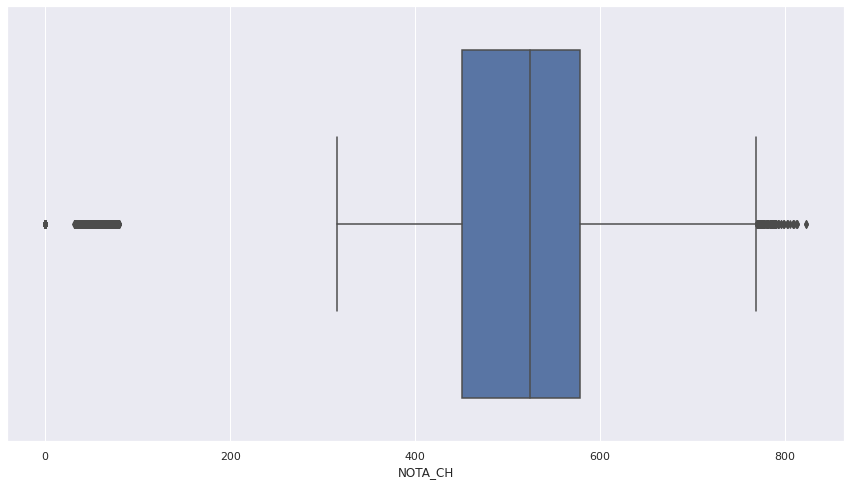

In [52]:
sns.boxplot(x="NOTA_CH", data=enem_sp)
plt.show()

In [ ]:
grafico = px.box(enem_sp, y="NOTA_LC")
grafico.show()

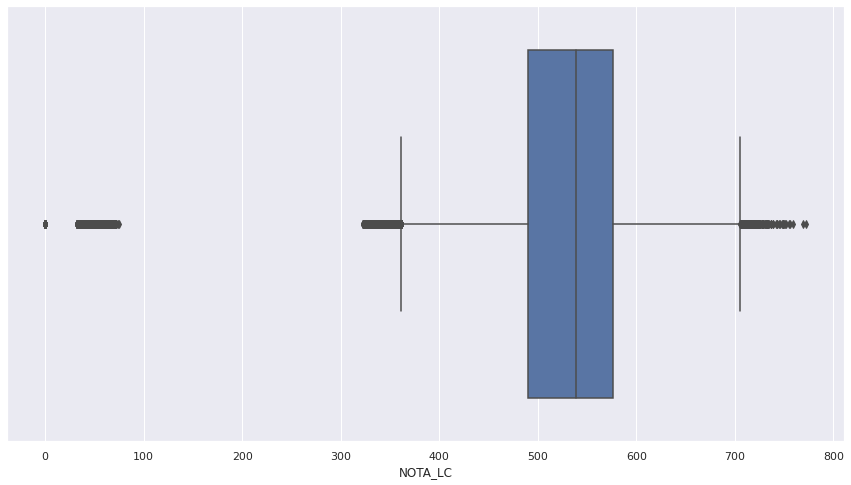

In [53]:
sns.boxplot(x="NOTA_LC", data=enem_sp)
plt.show()

In [ ]:
grafico = px.box(enem_sp, y="NOTA_REDACAO")
grafico.show()

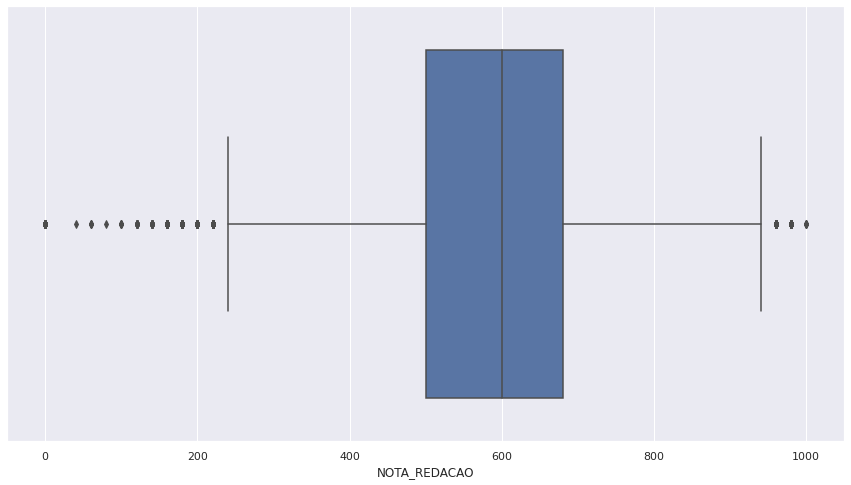

In [54]:
sns.boxplot(x="NOTA_REDACAO", data=enem_sp)
plt.show()

Também podemos graficar o Boxplot da nota de matemáticas em relação ao Sexo por exemplo. Desta maneira podemos elaborar uma análise comparativa.

In [ ]:
grafico = px.box(enem_sp, x = 'SEXO', y="NOTA_MT")
grafico.show()

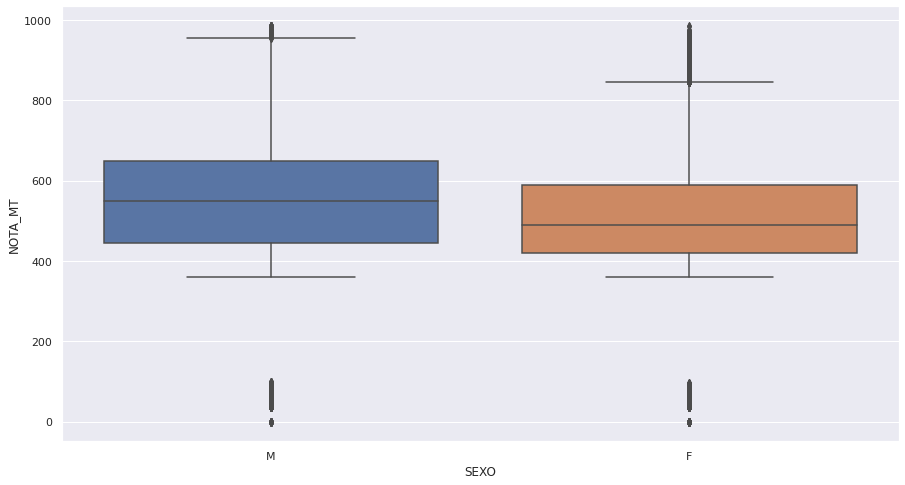

In [56]:
sns.boxplot(x="SEXO", y="NOTA_MT", data=enem_sp)
plt.show()

Perebe-se no gráfico anterior, que existem mais ouliers superiores nas mulheres do que nos homens. Além disso, a mediana das nostas do homens é levemente superior à das mulheres.

Também podemos graficar o Boxplot da nota de matemáticas em relação à raça por exemplo. Desta maneira podemos elaborar uma análise comparativa.

In [ ]:
grafico = px.box(enem_sp, x = 'RACA', y="NOTA_MT")
grafico.show()

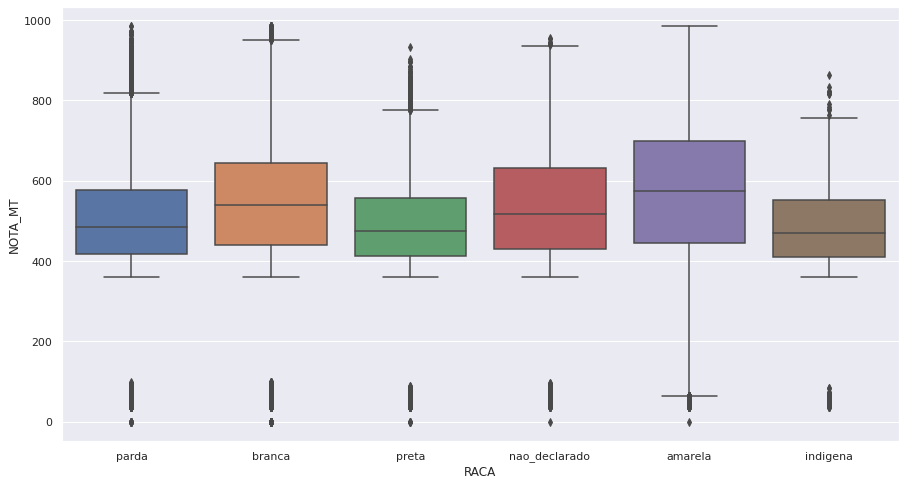

In [57]:
sns.boxplot(x="RACA", y="NOTA_MT", data=enem_sp)
plt.show()

- Dentre todas as raças, a raça AMARELA tem menos outliers. Logo segundo o tamanho e a posição da caixa, a raça amarela teria o melhor desempenho na prova de matemáticas;
- As raças preta e parda teriam uma maior concentração de outliers;
- Aparentemente o pior desempenho na prova de matemáticas estaria associada à raça indigena. No entanto, observe as medianas que estão proximas umas das outras.

Por último queremos pesquisa se existe alguma relção entre o tipo de escola e a nota de matemática, ou seja, se influência em algo a escola no desempenho da nota de matemáticas.

In [ ]:
grafico = px.box(enem_sp, x = 'ESCOLA', y="NOTA_MT")
grafico.show()

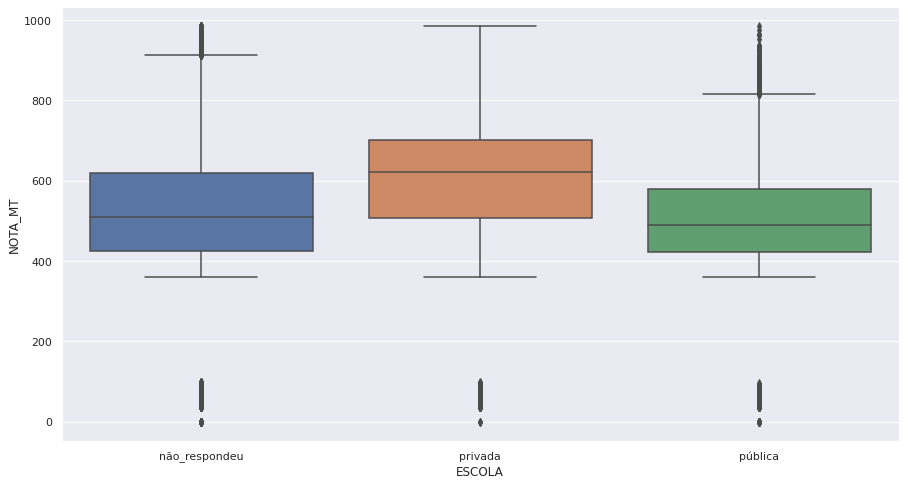

In [58]:
sns.boxplot(x="ESCOLA", y="NOTA_MT", data=enem_sp)
plt.show()

**DESCRITIVO**

Conforme esperado, os alunos das escolas privadas tiveram um melhor desempenho (melhores notas) na prova de matemáticas no geral (perceba sua mediana) e também possuem menos valores "outliers" associados. em outras palavras, 50% do total de notas de matemáticas na escola privada está concentrado no intervalo [507 - 700] e na pública [422 - 579]

**DIAGNOSTICO**

Segundo a análise descritiva, podemos diagnosticar que provavelmente o método de ensino em escolas públcias com relação à disciplina de matematicas não está sendo eficiente, porque não geral, os alunos pertencentes nesse tipo de escola não obtiveram "muito" bons resultados quando comparados a escolas privadas.

**PRESCRITIVO**

Talvez mudar a metodologia de ensio especificamente nas aulas das matemáticas possa trazer melhores resultados. Ou seja, reforças as aulas de matemáticas, deixar mais exercicios aos alunos para praticarem, aulas extras de reforco de conteúdo, fazer simulacros tipo a prova de ENEM, entre outras.